
<body>
<h1>ISDA 111 - Video Game Data Analytics Project</h1>
<p>Hi team, This is the starter document we can use.</p>
<h2>Team Members: add your name here</h2>
<p>Chris Alcala - Handimexi</p>
<p>Wilson Huynh - mybedro0m</p>
<p>Fernando Valle - Jando Fett</p>

</body>



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

In [7]:
df = pd.read_csv("game_data_all.csv")
df.columns

Index(['Unnamed: 0', 'game', 'link', 'release', 'peak_players',
       'positive_reviews', 'negative_reviews', 'total_reviews', 'rating',
       'primary_genre', 'store_genres', 'publisher', 'developer',
       'detected_technologies', 'store_asset_mod_time', 'review_percentage',
       'players_right_now', '24_hour_peak', 'all_time_peak',
       'all_time_peak_date'],
      dtype='object')

In [8]:
#Rename columns
df = df.rename(columns={
    '24_hour_peak': 'peak24',
    'all_time_peak': 'peak_all',
    'all_time_peak_date': 'peak_all_date',
    'link': 'url'
})

#Convert dates 
if 'release' in df.columns:
    df['release'] = pd.to_datetime(df['release'], errors='coerce')

if 'peak_all_date' in df.columns:
    df['peak_all_date'] = pd.to_datetime(df['peak_all_date'], errors='coerce')


#Convert numeric columns
num_cols = [
    'peak_players', 
    'positive_reviews', 
    'negative_reviews',
    'total_reviews',
    'peak24', 
    'peak_all'
]

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


#Remove duplicates + rows missing game name
if 'game' in df.columns:
    df = df[df['game'].notna()]

df = df.drop_duplicates()


#Fill missing numeric & text values
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

for col in ['publisher', 'developer', 'game']:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown")


#Create simple new features
if 'release' in df.columns:
    df['year'] = df['release'].dt.year

if 'positive_reviews' in df.columns and 'total_reviews' in df.columns:
    df['pos_ratio'] = df['positive_reviews'] / (df['total_reviews'] + 1)


#show output
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67571 entries, 0 to 67570
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             67571 non-null  int64         
 1   game                   67571 non-null  object        
 2   url                    67571 non-null  object        
 3   release                67571 non-null  datetime64[ns]
 4   peak_players           67571 non-null  int64         
 5   positive_reviews       67571 non-null  int64         
 6   negative_reviews       67571 non-null  int64         
 7   total_reviews          67571 non-null  int64         
 8   rating                 67571 non-null  float64       
 9   primary_genre          67561 non-null  object        
 10  store_genres           67514 non-null  object        
 11  publisher              67571 non-null  object        
 12  developer              67571 non-null  object        
 13  d

   Unnamed: 0                              game            url    release  \
0           0                       Pizza Tower  /app/2231450/ 2023-01-26   
1           1                   Resident Evil 4  /app/2050650/ 2023-03-24   
2           2  The Murder of Sonic the Hedgehog  /app/2324650/ 2023-03-31   
3           3                Pineapple on pizza  /app/2263010/ 2023-03-28   
4           4                        Hi-Fi RUSH  /app/1817230/ 2023-01-25   

   peak_players  ...  peak24  peak_all  peak_all_date  year pos_ratio  
0          4529  ...     0.0      4529     2023-03-25  2023  0.988620  
1        168191  ...     0.0    168191     2023-03-25  2023  0.974483  
2         15543  ...   776.0     15543     2023-03-31  2023  0.983355  
3          1415  ...   101.0      1415     2023-03-28  2023  0.982393  
4          6132  ...   664.0      6132     2023-01-29  2023  0.977551  

[5 rows x 22 columns]

In [9]:
df.describe()


         Unnamed: 0                        release  peak_players  \
count  67571.000000                          67571  6.757100e+04   
mean   33785.000000  2019-09-19 12:39:46.609640448  9.528674e+02   
min        0.000000            2006-02-07 00:00:00  0.000000e+00   
25%    16892.500000            2018-01-26 00:00:00  3.000000e+00   
50%    33785.000000            2020-03-29 00:00:00  7.000000e+00   
75%    50677.500000            2021-11-16 00:00:00  4.600000e+01   
max    67570.000000            2023-12-31 00:00:00  3.257248e+06   
std    19506.211857                            NaN  1.979093e+04   

       positive_reviews  negative_reviews  ...        peak24      peak_all  \
count      6.757100e+04      67571.000000  ...  67571.000000  6.757100e+04   
mean       1.273527e+03        216.893801  ...     11.776058  9.629879e+02   
min        0.000000e+00          0.000000  ...      0.000000  0.000000e+00   
25%        5.000000e+00          1.000000  ...      0.000000  3.000000e+00 

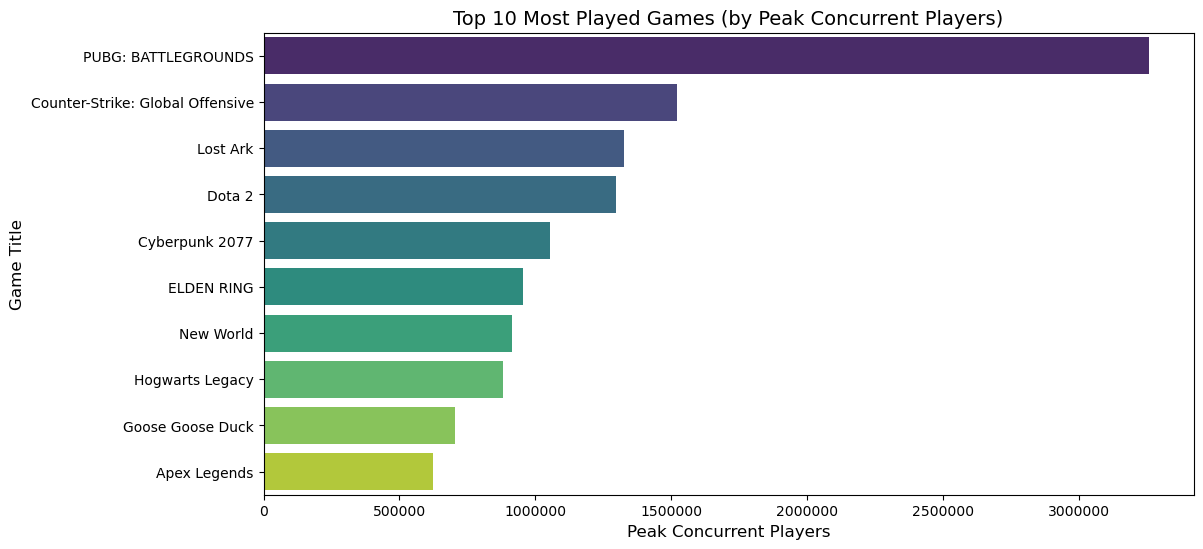

In [24]:
#This visualization shows the top 10 games with the highest peak player counts,
#helping us identify which titles had the largest player activity at one time.
top10 = df.nlargest(10, 'peak_players')

plt.figure(figsize=(12,6))

sns.barplot(
    data=top10,
    x='peak_players',
    y='game',
    hue='game',
    palette='viridis',
    dodge=False,
    legend=False
)

plt.title("Top 10 Most Played Games (by Peak Concurrent Players)", fontsize=14)
plt.xlabel("Peak Concurrent Players", fontsize=12)
plt.ylabel("Game Title", fontsize=12)


plt.ticklabel_format(style='plain', axis='x')

plt.show()



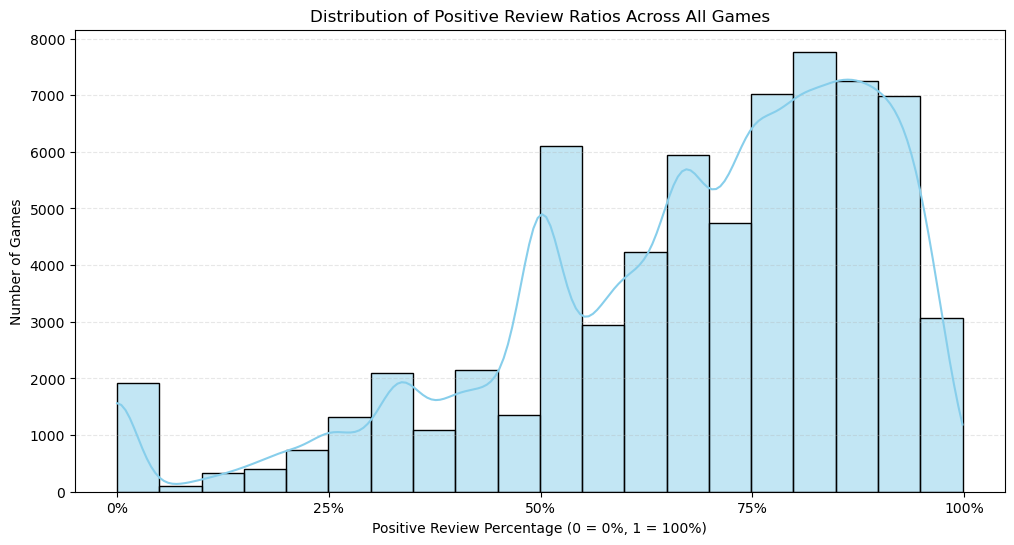

In [18]:
#This visualization shows how positive the reviews are across all games by
#displaying how many games fall into each review percentage range.

plt.figure(figsize=(12,6))
sns.histplot(
    df['pos_ratio'],
    bins=20,
    kde=True,                  
    color='skyblue',
    edgecolor='black'
)

plt.title("Distribution of Positive Review Ratios Across All Games")
plt.xlabel("Positive Review Percentage (0 = 0%, 1 = 100%)")
plt.ylabel("Number of Games")
plt.xticks([0, 0.25, 0.50, 0.75, 1.00], ["0%", "25%", "50%", "75%", "100%"])
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()


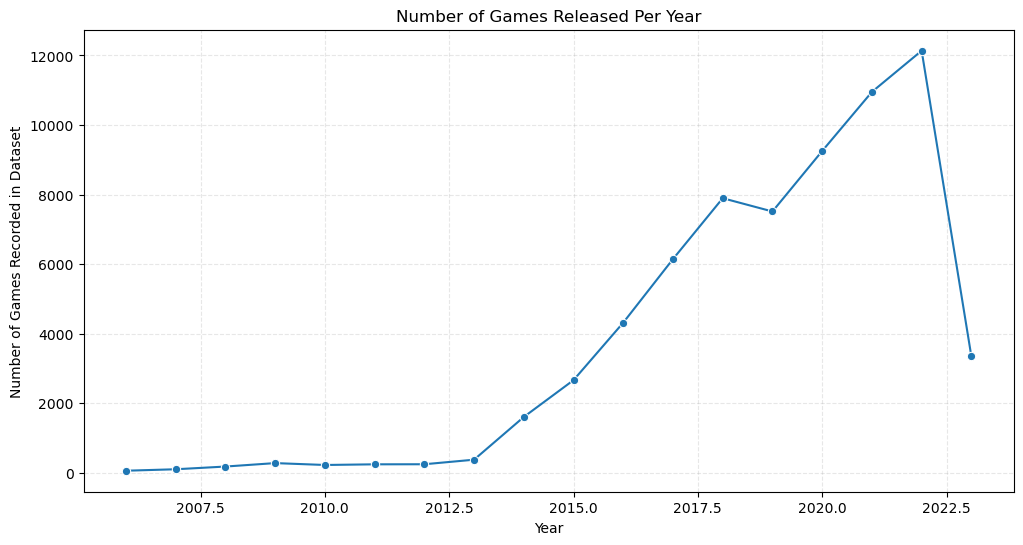

In [22]:
#This visualization shows how many games were released each year in the dataset,
#allowing us to observe long-term growth trends while noting incomplete recent years.

games_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=games_per_year.index, y=games_per_year.values, marker="o")

plt.title("Number of Games Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Games Recorded in Dataset")

plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


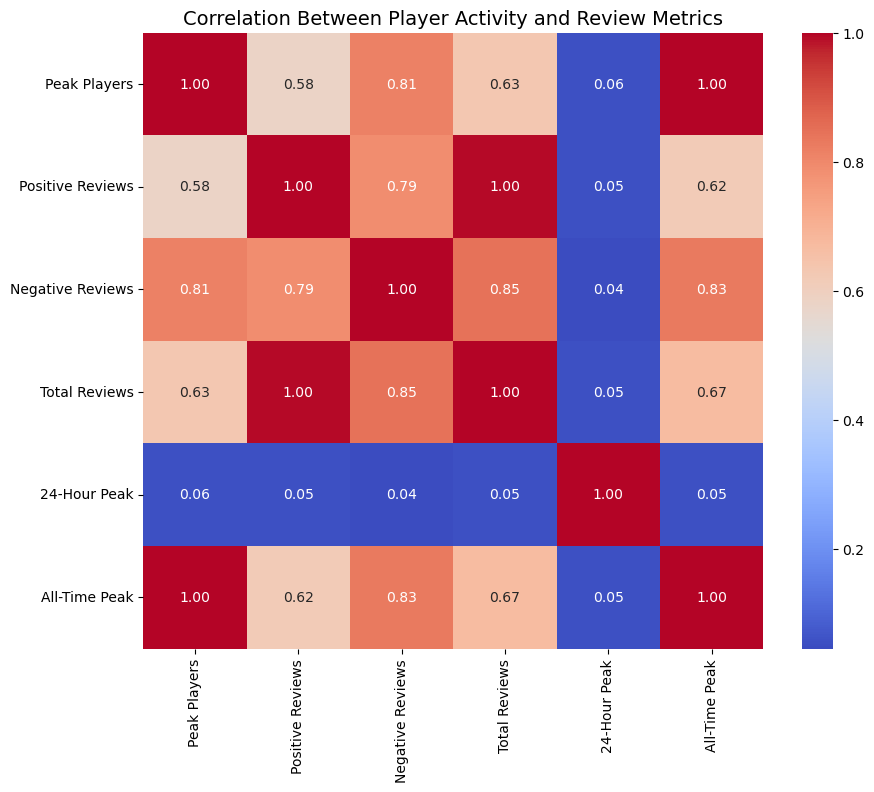

In [25]:
#This visualization displays how strongly different game statistics relate to each other,
#helping us understand which metrics tend to increase together.

plt.figure(figsize=(10,8))

corr_cols = [
    'peak_players',
    'positive_reviews',
    'negative_reviews',
    'total_reviews',
    'peak24',
    'peak_all'
]

corr_matrix = df[corr_cols].corr()

clean_labels = {
    'peak_players': 'Peak Players',
    'positive_reviews': 'Positive Reviews',
    'negative_reviews': 'Negative Reviews',
    'total_reviews': 'Total Reviews',
    'peak24': '24-Hour Peak',
    'peak_all': 'All-Time Peak'
}

corr_matrix = corr_matrix.rename(index=clean_labels, columns=clean_labels)

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)

plt.title("Correlation Between Player Activity and Review Metrics", fontsize=14)
plt.show()
